In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

# Load and clean data

In [ ]:
# Read datasets
atlantic_data = pd.read_csv('/content/drive/MyDrive/IDS_project_D23/datasets/atlantic.csv')
pacific_data = pd.read_csv('/content/drive/MyDrive/IDS_project_D23/datasets/pacific.csv')

print(atlantic_data.shape)
print(atlantic_data.dtypes)
atlantic_data.head(10)


(49105, 22)
ID                  object
Name                object
Date                 int64
Time                 int64
Event               object
Status              object
Latitude            object
Longitude           object
Maximum Wind         int64
Minimum Pressure     int64
Low Wind NE          int64
Low Wind SE          int64
Low Wind SW          int64
Low Wind NW          int64
Moderate Wind NE     int64
Moderate Wind SE     int64
Moderate Wind SW     int64
Moderate Wind NW     int64
High Wind NE         int64
High Wind SE         int64
High Wind SW         int64
High Wind NW         int64
dtype: object


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,AL011851,UNNAMED,18510626,0,,HU,28.2N,97.0W,70,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,AL011851,UNNAMED,18510626,600,,TS,28.3N,97.6W,60,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,AL011851,UNNAMED,18510626,1200,,TS,28.4N,98.3W,60,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,AL011851,UNNAMED,18510626,1800,,TS,28.6N,98.9W,50,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,AL011851,UNNAMED,18510627,0,,TS,29.0N,99.4W,50,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
print(pacific_data.shape)
print(pacific_data.dtypes)

(26137, 22)
ID                  object
Name                object
Date                 int64
Time                 int64
Event               object
Status              object
Latitude            object
Longitude           object
Maximum Wind         int64
Minimum Pressure     int64
Low Wind NE          int64
Low Wind SE          int64
Low Wind SW          int64
Low Wind NW          int64
Moderate Wind NE     int64
Moderate Wind SE     int64
Moderate Wind SW     int64
Moderate Wind NW     int64
High Wind NE         int64
High Wind SE         int64
High Wind SW         int64
High Wind NW         int64
dtype: object


In [ ]:
# Adding columns
atlantic_data.Date = atlantic_data.Date.astype("object")
print(atlantic_data.dtypes)
# atlantic_data["Year"] = atlantic_data.Date[0:4]
# atlantic_data["Month"] = atlantic_data.Date[5:7]
# atlantic_data["Day"] = atlantic_data.Date[7:]
atlantic_data.head(5)

ID                  object
Name                object
Date                object
Time                 int64
Event               object
Status              object
Latitude            object
Longitude           object
Maximum Wind         int64
Minimum Pressure     int64
Low Wind NE          int64
Low Wind SE          int64
Low Wind SW          int64
Low Wind NW          int64
Moderate Wind NE     int64
Moderate Wind SE     int64
Moderate Wind SW     int64
Moderate Wind NW     int64
High Wind NE         int64
High Wind SE         int64
High Wind SW         int64
High Wind NW         int64
dtype: object


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
a = atlantic_data.Date[:]
atlantic_data["Year"] = [str(date)[0:4] for date in a]
atlantic_data["Month"] = [str(date)[4:6] for date in a]
atlantic_data["Day"] = [str(date)[6:] for date in a]
atlantic_data = atlantic_data.drop('Date', axis=1)
atlantic_data.head(5)

atlantic_data["Year"] = atlantic_data.Year.astype("int64")
atlantic_data["Month"] = atlantic_data.Month.astype("int64")
atlantic_data["Day"] = atlantic_data.Day.astype("int64")


# Visualize features for extraction

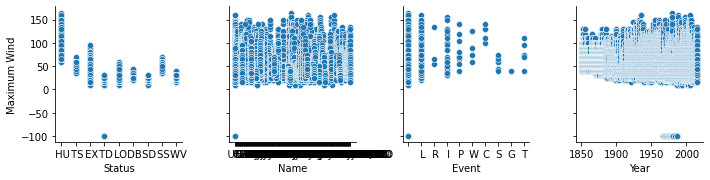

In [ ]:
# We visualize our data based on their status
sns.pairplot(atlantic_data, x_vars=["Status", "Name","Event","Year"], y_vars=["Maximum Wind"])


Text(0.5, 1.0, 'Year 1851-2014')

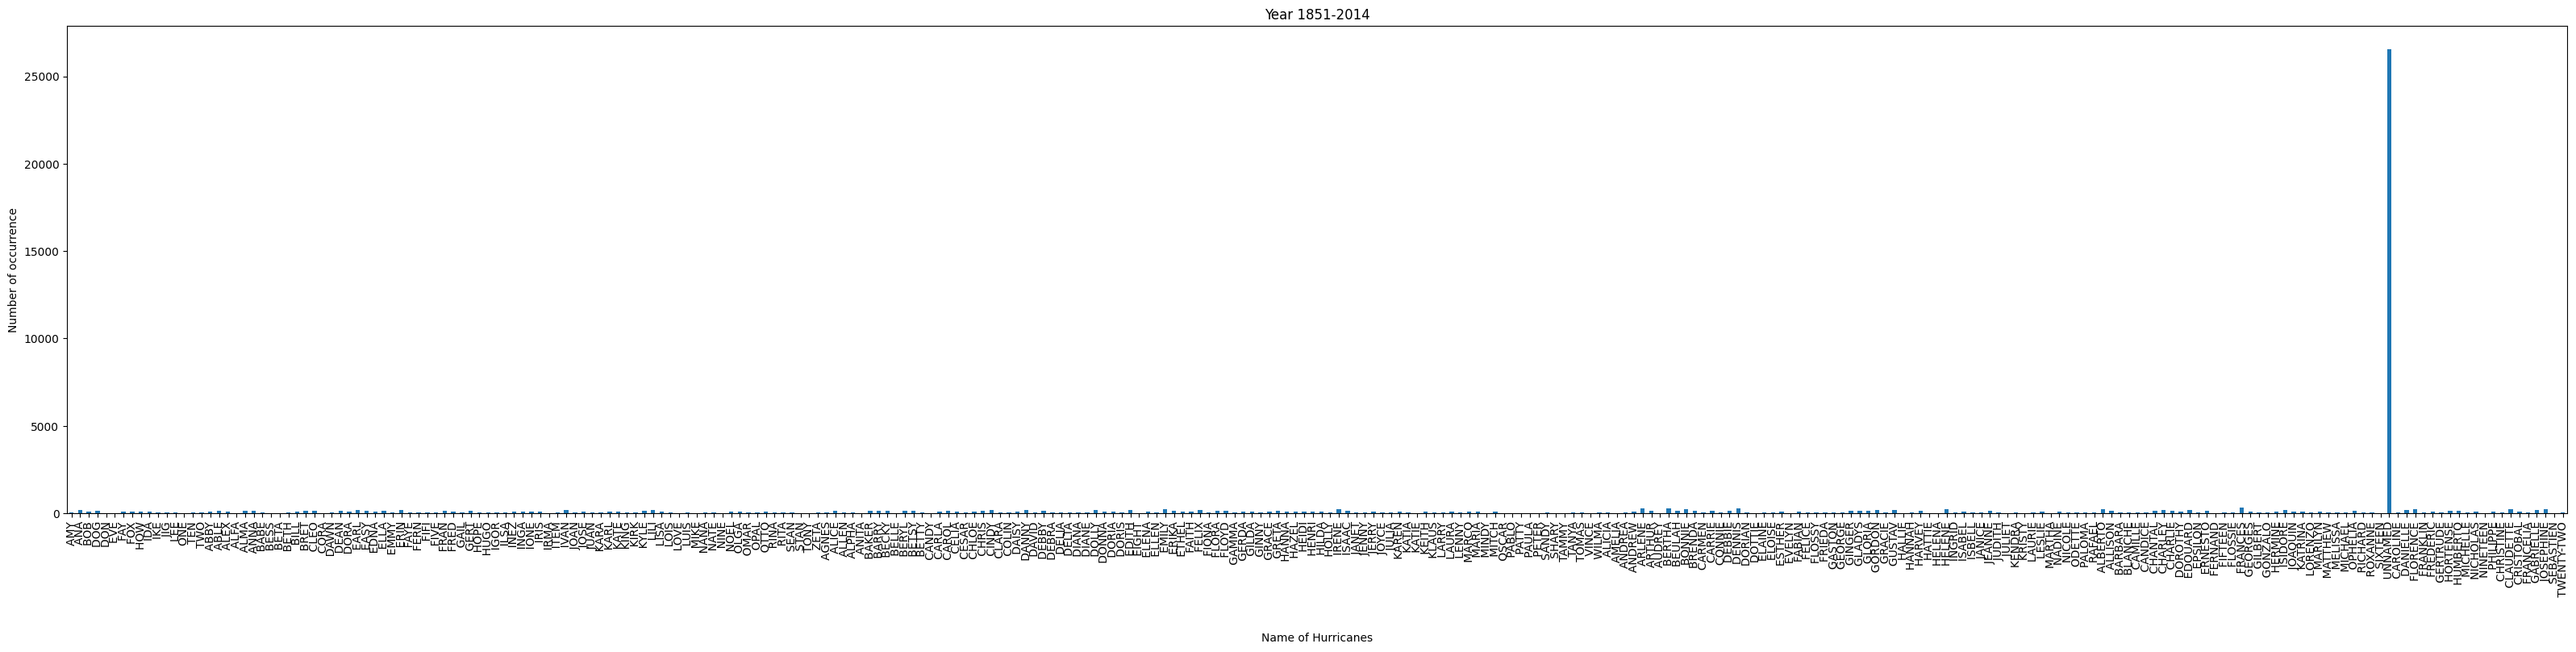

In [ ]:
pd.set_option('display.max_rows', None)
plt.figure(figsize=(40,8), dpi= 100, facecolor='w', edgecolor='k')

# get unique names value count, sort and plot
atlantic_names_count = atlantic_data.Name.value_counts()
atlantic_names_count.sort_index().plot(kind="bar")
plt.ylabel('Number of occurrence')
plt.xlabel("Name of Hurricanes")
plt.title("Year 1851-2014")

# Correlating the yearly changes in Maximum Wind 

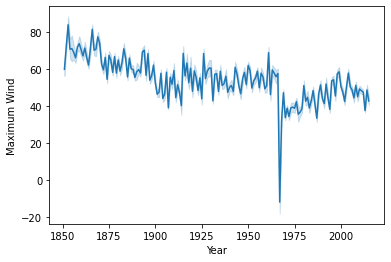

In [ ]:
sns.lineplot(x=atlantic_data['Year'], y=atlantic_data['Maximum Wind'])

In [ ]:
# Correcting error in negative wind value
atlantic_data[atlantic_data['Maximum Wind'] < 0] 

atlantic_data['Maximum Wind'] = atlantic_data['Maximum Wind'].replace(range(-999,-1) ,np.mean(atlantic_data['Maximum Wind']))
atlantic_data.head(5)

,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day
0,AL011851,UNNAMED,0,,HU,28.0N,94.8W,80.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
1,AL011851,UNNAMED,600,,HU,28.0N,95.4W,80.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
2,AL011851,UNNAMED,1200,,HU,28.0N,96.0W,80.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
3,AL011851,UNNAMED,1800,,HU,28.1N,96.5W,80.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
4,AL011851,UNNAMED,2100,L,HU,28.2N,96.8W,80.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25


Text(0.5, 1.0, 'Evolutional changes in Maximum Wind')

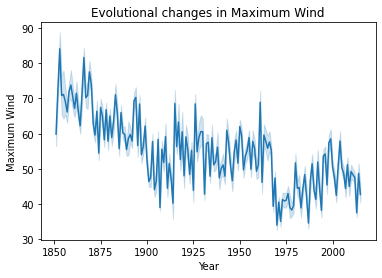

In [ ]:

# plt.figure(figsize=(16,8))
sns.lineplot(x=atlantic_data['Year'], y=atlantic_data['Maximum Wind'])
plt.title("Evolutional changes in Maximum Wind")


In the recent years from 2000-2014, the maximum wind seems to decrease, therefore we'd like to know the names of the popular hurricanes in those years

(49105, 24)


Text(0, 0.5, 'Frequency of occurence')

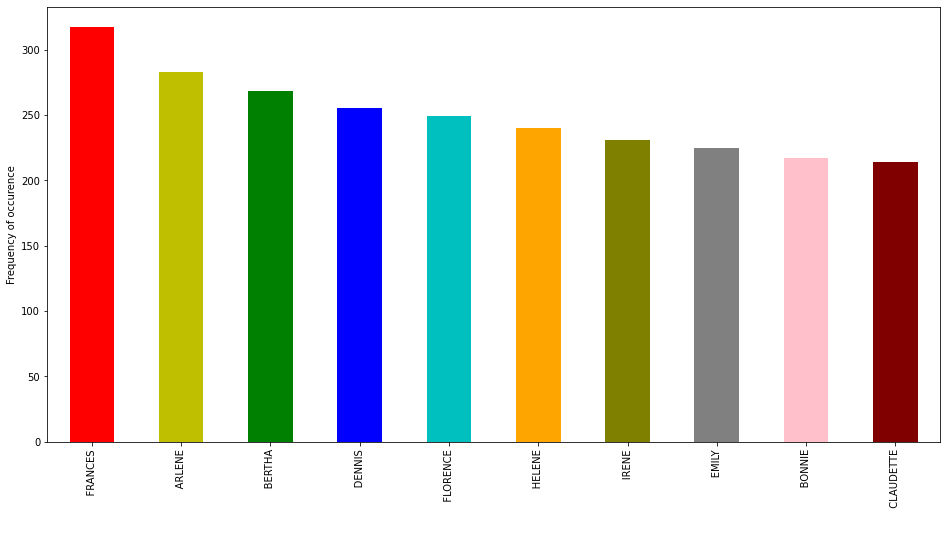

In [ ]:
# Find unique IDS
atlantic_data = atlantic_data.drop_duplicates()
print(atlantic_data.shape)

atlantic_data["Name"].value_counts()
atlantic_data_counts = (atlantic_data["Name"].value_counts())

atlantic_data_counts[1:11].plot(kind='bar',stacked=False, figsize=(16,8),  color=['r', 'y', 'g', 'b', 'c', 'orange', 
               'olive', 'gray', 'pink', 'maroon'])
# plt.xlabel("Name")
plt.ylabel("Frequency of occurence")
# plt.title("Atlantic Ocean - Top 10 Hurricanes")

In [ ]:
# to be used if needed
def split_year(year):
  return atlantic_data[atlantic_data['Year'] == year]
years = range(1949, 2014, 5)

df = pd.DataFrame(columns=atlantic_data.columns)
frames = []
for year in range(1949, 2014, 5):
  df_split = split_year(year)
  frames.append(df_split)
total_df = pd.concat(frames)
total_df.head(5)



,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day
21485,AL011949,UNNAMED,0,,TS,21.2N,61.5W,55.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1949,8,21
21486,AL011949,UNNAMED,600,,TS,21.9N,63.2W,60.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1949,8,21
21487,AL011949,UNNAMED,1200,,HU,22.6N,64.9W,65.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1949,8,21
21488,AL011949,UNNAMED,1800,,HU,23.3N,66.6W,70.0,993,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1949,8,21
21489,AL011949,UNNAMED,0,,HU,24.0N,68.3W,75.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1949,8,22


# Here, we run a few classification models on our dataset

In [ ]:
# We need to split our data into label and features
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve 

np.random.seed(1111)
# dropping unnamed hurricanes
atlantic_data_realnames = atlantic_data.drop(atlantic_data.index[atlantic_data['Name'] == '            UNNAMED']) 
X = atlantic_data_realnames.drop(["Status", "Name", "ID", "Event", "Latitude", "Longitude"], axis=1) # features
# X = atlantic_data["Maximum Wind"]
y = atlantic_data_realnames.Status # label

# X = np.array(X).reshape(-1, 1)
# y = np.array(y).reshape(-1, 1)

# Then we split to test and train samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=135)
print(X.shape, y.shape)
atlantic_data_realnames.head(10)

(22542, 18) (22542,)


,ID,Name,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day
21879,AL011950,ABLE,0,,TS,17.1N,55.5W,35.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,12
21880,AL011950,ABLE,600,,TS,17.7N,56.3W,40.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,12
21881,AL011950,ABLE,1200,,TS,18.2N,57.4W,45.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,12
21882,AL011950,ABLE,1800,,TS,19.0N,58.6W,50.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,12
21883,AL011950,ABLE,0,,TS,20.0N,60.0W,50.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,13
21884,AL011950,ABLE,600,,TS,20.7N,61.1W,50.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,13
21885,AL011950,ABLE,1200,,TS,21.3N,62.2W,55.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,13
21886,AL011950,ABLE,1800,,TS,22.0N,63.2W,55.0,997,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,13
21887,AL011950,ABLE,0,,TS,22.7N,63.8W,60.0,995,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,14
21888,AL011950,ABLE,600,,TS,23.1N,64.6W,60.0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950,8,14


In [ ]:
# Decision Tree Classifier
%%time
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')
print("AUC for DT: {:.3f}".format(dt_auc))
print("Accuracy:", dt.score(X_test, y_test))


AUC for DT: 0.887
Accuracy: 0.8903182876788289
CPU times: user 188 ms, sys: 23.9 ms, total: 212 ms
Wall time: 498 ms


In [ ]:
# RF 
from sklearn.ensemble import RandomForestClassifier
# Parameter Tuning
for i in range(100, 300, 50):

  rf = RandomForestClassifier(random_state=0, n_estimators=i)
  rf.fit(X_train, y_train)
  rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
  print("N=", i)
  print("AUC for RF: {:.3f}".format(rf_auc))
  print("Accuracy:", rf.score(X_test, y_test))


N= 100
AUC for RF: 0.982
Accuracy: 0.9037373849395586
N= 150
AUC for RF: 0.983
Accuracy: 0.9028501718975269
N= 200
AUC for RF: 0.984
Accuracy: 0.9031828767882888
N= 250
AUC for RF: 0.984
Accuracy: 0.902739270267273


In [ ]:
# Random Forest Classifier
%%time
rf = RandomForestClassifier(random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
print("N=", i)
print("AUC for RF: {:.3f}".format(rf_auc))
print("Accuracy:", rf.score(X_test, y_test))

N= 250
AUC for RF: 0.984
Accuracy: 0.9031828767882888
CPU times: user 3.54 s, sys: 97.8 ms, total: 3.64 s
Wall time: 3.62 s


n_estimators = 200 has best accuracy score and AUC

In [ ]:
# Logistic Regression
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')
print("AUC for LR: {:.3f}".format(lr_auc))
print("Accuracy:", lr.score(X_test, y_test))

AUC for LR: 0.758
Accuracy: 0.7371631362981036
CPU times: user 2.17 s, sys: 1.59 s, total: 3.76 s
Wall time: 2 s


In [ ]:
# KNN
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')
print("AUC for KNN: {:.3f}".format(knn_auc))
print("Accuracy:", knn.score(X_test, y_test))


AUC for KNN: 0.855
Accuracy: 0.826993456803815
CPU times: user 5.57 s, sys: 1.07 s, total: 6.64 s
Wall time: 5.68 s


#### Here we try to predict the classes of our test data based on the top 3 (AUC > 0.85) performing models

In [ ]:
# Class Prediction 
# print(y_test)
model_list = [knn, rf, dt] # AUC > 0.85
idx = X_test.index
for model in model_list:
  ypred = model.predict(X_test)
  print("\n")
  print("Model =", str(model))
  for i in range(0,10):
    print("The predicted Hurricane {} with ID {} is classified as {} but the real status is {} ".format((atlantic_data.Name.loc[idx[i]]).strip(), atlantic_data.ID.loc[idx[i]], ypred[i], y_test.loc[idx[i]]))
  



Model = KNeighborsClassifier(n_neighbors=7)
The predicted Hurricane ELLA with ID AL051966 is classified as  TS but the real status is  TS 
The predicted Hurricane ANDREW with ID AL011986 is classified as  TS but the real status is  TS 
The predicted Hurricane HAZEL with ID AL141954 is classified as  HU but the real status is  HU 
The predicted Hurricane JANICE with ID AL101958 is classified as  HU but the real status is  HU 
The predicted Hurricane GINNY with ID AL081963 is classified as  HU but the real status is  HU 
The predicted Hurricane BRENDA with ID AL021968 is classified as  TD but the real status is  TD 
The predicted Hurricane FOX with ID AL061950 is classified as  EX but the real status is  TS 
The predicted Hurricane ALFA with ID AL061973 is classified as  TS but the real status is  SS 
The predicted Hurricane DENNIS with ID AL101987 is classified as  TD but the real status is  TD 
The predicted Hurricane GRETA with ID AL161978 is classified as  TD but the real status is

Conclusion:

Model evaluation here shows that the best model that works with our dataset is the Random Forest classifier which has a higher accuracy and AUC as compared to others. 
With that model, the default configurations can be used while setting the n_estimators = 200 and random_state=0 


